In [29]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
%matplotlib inline

F = pd.read_csv("C:/Users/z5130037/OneDrive - UNSW/CAVSeverityResults/D0_results/InputData/SSAMConsolidated/Frequency.csv", delimiter=',')


In [30]:
#plt.imshow(F,cmap='hot',interpolation='nearest')

vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

seeds = ["Seed1", "Seed2", "Seed3"]
CAVPenetration = ["0%", "10%", "20%",
           "30%", "40%", "50%", "60%", "70%", "80%", "90%", "100%"]

frequency = np.array([[7333, 3804, 3129, 2466, 2496, 2715, 2884, 2937, 3145, 3371, 3594],
                    [7354, 3551, 2796, 2480, 2511, 2704, 2891, 2990, 3181, 3475, 3706],  
                    [7563, 3708, 2804, 2560, 2592, 2664, 2785, 2995, 3311, 3570, 3809]])


fig, ax = plt.subplots()
im = ax.imshow(frequency, cmap='seismic')

# I want to show all ticks
ax.set_xticks(np.arange(len(CAVPenetration)))
ax.set_yticks(np.arange(len(seeds)))
# ... and label them with the respective list entries
ax.set_xticklabels(CAVPenetration)
ax.set_yticklabels(seeds)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
##for i in range(len(seeds)):
##    for j in range(len(CAVPenetration)):
##        text = ax.text(j, i, frequency[i, j],
##                       ha="center", va="center", color="w")

# Loop over data dimensions and create text annotations.
for i in range(len(seeds)):
    for j in range(len(CAVPenetration)):
        text = ax.text(j, i, frequency[i, j],
                       ha="right", va="center",color="y", fontsize=10)

ax.set_title("Number of potential collisions detected by Surrogate Safety Assessment Model")
#fig.tight_layout()
plt.show()

def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, aspect = 3,**kwargs)
    #m = ax.imshow(data, aspect = 3, cmap='seismic')
#seismic, viridis, inferno
    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=False, labelbottom=True)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="center")
             #rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(fontsize= 15, horizontalalignment="center",
              verticalalignment="center", rotation=90)
    kw.update(textkw)
    
 ##   {'fontsize': rcParams['axes.titlesize'],
 ##'fontweight' : rcParams['axes.titleweight'],
 ##'verticalalignment': 'baseline',
 ##'horizontalalignment': loc}

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

seeds = ["Seed1", "Seed2", "Seed3"]
CAVPenetration = ["0%", "10%", "20%",
           "30%", "40%", "50%", "60%", "70%", "80%", "90%", "100%"]

frequency = np.array([[7333, 3804, 3129, 2466, 2496, 2715, 2884, 2937, 3145, 3371, 3594],
                    [7354, 3551, 2796, 2480, 2511, 2704, 2891, 2990, 3181, 3475, 3706],  
                    [7563, 3708, 2804, 2560, 2592, 2664, 2785, 2995, 3311, 3570, 3809]])


fig, ax = plt.subplots()

im, cbar = heatmap(frequency, seeds, CAVPenetration, ax=ax,
                   cmap="YlGn", cbarlabel="Number of Potential Collisions")
texts = annotate_heatmap(im, valfmt="{x:.1f}")

#fig.tight_layout()
#ax.set_title("Number of Potential Collisions Detected by Surrogate Safety Assessment Model", loc="center", pad = 30, fontsize =18,fontweight='bold')
ax.set_title("", loc="center", pad = 300, fontsize =18,fontweight='bold')

plt.show()

freq = pd.read_csv("C:\\Users\\z5130037\\Desktop\\freq.csv", header= None)
#give the address to the consolidated panadas dataframe of the variable you want to plot heatmap of 

frequency = freq.to_numpy()

###seeds = ["standstill distance = 0.25 Seed1", "standstill distance = 0.25 Seed2", "standstill distance = 0.25 Seed3","standstill distance = 0.5 Seed1", "standstill distance = 0.5 Seed2", "standstill distance = 0.5 Seed3","standstill distance = 0.75 Seed1", "standstill distance = 0.75 Seed2", "standstill distance = 0.75 Seed3","standstill distance = 1.0 Seed1", "standstill distance = 1.0 Seed2", "standstill distance = 1.0 Seed3"
###        ,"standstill distance = 1.25 Seed1", "standstill distance = 1.25 Seed2", "standstill distance = 1.25 Seed3","standstill distance = 1.5 Seed1", "standstill distance = 1.5 Seed2", "standstill distance = 1.5 Seed3","standstill distance = 1.75 Seed1", "standstill distance = 1.75 Seed2", "standstill distance = 1.75 Seed3",
###        "standstill distance = 2.0 Seed1", "standstill distance = 2.0 Seed2", "standstill distance = 2.0 Seed3"]

seeds = ["standstill distance = 0.25 Seed1", "standstill distance = 0.25 Seed2", "standstill distance = 0.25 Seed3","standstill distance = 0.50 Seed1", "standstill distance = 0.50 Seed2", "standstill distance = 0.50 Seed3","standstill distance = 0.75 Seed1", "standstill distance = 0.75 Seed2", "standstill distance = 0.75 Seed3","standstill distance = 1.00 Seed1", "standstill distance = 1.00 Seed2", "standstill distance = 1.00 Seed3"
        ,"standstill distance = 1.25 Seed1", "standstill distance = 1.25 Seed2", "standstill distance = 1.25 Seed3","standstill distance = 1.50 Seed1", "standstill distance = 1.50 Seed2", "standstill distance = 1.50 Seed3","standstill distance = 1.75 Seed1", "standstill distance = 1.75 Seed2", "standstill distance = 1.75 Seed3",
        "standstill distance = 2.00 Seed1", "standstill distance = 2.00 Seed2", "standstill distance = 2.00 Seed3"]

CAVPenetration = ["0%", "10%", "20%",
           "30%", "40%", "50%", "60%", "70%", "80%", "90%", "100%"]

fig, ax = plt.subplots()

#used for setting the size
fig.set_figheight(28)
fig.set_figwidth(20)

im, cbar = heatmap(frequency, seeds, CAVPenetration, ax=ax,
                   cmap="YlGnBu", cbarlabel="Rate of Potential Collisions")
texts = annotate_heatmap(im, valfmt="{x:.1f}")

#fig.tight_layout()
#ax.set_title("Number of Potential Collisions Detected by Surrogate Safety Assessment Model", loc="center", pad = 30, fontsize =18,fontweight='bold')
ax.set_title("", loc="center", pad = 300, fontsize =18,fontweight='bold')
#ax.figure(figsize=(3,4)
plt.show()
#YlGn
#PuBuGn


def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, aspect = 'auto',**kwargs, filternorm=True)
    #m = ax.imshow(data, aspect = 3, cmap='seismic')
#seismic, viridis, inferno
    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=False, labelbottom=True)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-0, ha="center", fontsize= 15, fontweight='bold')
             #rotation_mode="anchor")
        
    plt.setp(ax.get_yticklabels(), fontsize= 15)
    
#    plt.setp(ax.get_yticklabels(), rotation=-0, ha="center", fontsize= 10, fontweight='bold' )
    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.4f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(fontsize= 15, horizontalalignment="center",
              verticalalignment="center", rotation=0,fontweight='bold')
    kw.update(textkw)
    
 ##   {'fontsize': rcParams['axes.titlesize'],
 ##'fontweight' : rcParams['axes.titleweight'],
 ##'verticalalignment': 'baseline',
 ##'horizontalalignment': loc}

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [31]:
import pandas as pd
import numpy as np

In [32]:
BUS_0 = pd.read_csv(r'C:\Users\maxin\Desktop\Randwick_Results\AV_HB\0%\Result\SSAM_V2\collission_segregation.csv', delimiter = ',', header = 0)
BUS_10 = pd.read_csv(r'C:\Users\maxin\Desktop\Randwick_Results\AV_HB\10%\Result\SSAM_V2\collission_segregation.csv', delimiter = ',', header = 0)
BUS_30 = pd.read_csv(r'C:\Users\maxin\Desktop\Randwick_Results\AV_HB\30%\Result\SSAM_V2\collission_segregation.csv', delimiter = ',', header = 0)
BUS_50 = pd.read_csv(r'C:\Users\maxin\Desktop\Randwick_Results\AV_HB\50%\Result\SSAM_V2\collission_segregation.csv', delimiter = ',', header = 0)
BUS_70 = pd.read_csv(r'C:\Users\maxin\Desktop\Randwick_Results\AV_HB\70%\Result\SSAM_V2\collission_segregation.csv', delimiter = ',', header = 0)
BUS_90 = pd.read_csv(r'C:\Users\maxin\Desktop\Randwick_Results\AV_HB\90%\Result\SSAM_V2\collission_segregation.csv', delimiter = ',', header = 0)
AB_0 = pd.read_csv(r'C:\Users\maxin\Desktop\Randwick_Results\AV_AB\0%\Result\SSAM_V2\collission_segregation.csv', delimiter = ',', header = 0)
AB_10 = pd.read_csv(r'C:\Users\maxin\Desktop\Randwick_Results\AV_AB\10%\Result\SSAM_V2\collission_segregation.csv', delimiter = ',', header = 0)
AB_30 = pd.read_csv(r'C:\Users\maxin\Desktop\Randwick_Results\AV_AB\30%\Result\SSAM_V2\collission_segregation.csv', delimiter = ',', header = 0)
AB_50 = pd.read_csv(r'C:\Users\maxin\Desktop\Randwick_Results\AV_AB\50%\Result\SSAM_V2\collission_segregation.csv', delimiter = ',', header = 0)
AB_70 = pd.read_csv(r'C:\Users\maxin\Desktop\Randwick_Results\AV_AB\70%\Result\SSAM_V2\collission_segregation.csv', delimiter = ',', header = 0)
AB_90 = pd.read_csv(r'C:\Users\maxin\Desktop\Randwick_Results\AV_AB\90%\Result\SSAM_V2\collission_segregation.csv', delimiter = ',', header = 0)
AB_100 = pd.read_csv(r'C:\Users\maxin\Desktop\Randwick_Results\AV_AB\100%\Result\SSAM_V2\collission_segregation.csv', delimiter = ',', header = 0)


In [61]:
#0% BUS
BUS_0_MV_MV = ((BUS_0.loc[BUS_0['Interaction_Type'] == 'MV-MV']))
BUS_0_MV_MV = len(BUS_0_MV_MV['FirstVID'].unique())

BUS_0_BUS_BUS = (BUS_0.loc[BUS_0['Interaction_Type'] == 'BUS-BUS'])
BUS_0_BUS_BUS = len(BUS_0_BUS_BUS['FirstVID'].unique())

BUS_0_CAV_CAV = (BUS_0.loc[BUS_0['Interaction_Type'] == 'AV-AV'])
BUS_0_CAV_CAV = len(BUS_0_CAV_CAV['FirstVID'].unique())

BUS_0_MV_CAV = (BUS_0.loc[BUS_0['Interaction_Type'] == 'MV-AV'])
BUS_0_MV_CAV = len(BUS_0_MV_CAV['FirstVID'].unique())

BUS_0_CAV_MV = (BUS_0.loc[BUS_0['Interaction_Type'] == 'AV-MV'])
BUS_0_CAV_MV = len(BUS_0_CAV_MV['FirstVID'].unique())

BUS_0_MV_BUS = (BUS_0.loc[BUS_0['Interaction_Type'] == 'MV-BUS'])
BUS_0_MV_BUS = len(BUS_0_MV_BUS['FirstVID'].unique())

BUS_0_BUS_MV = (BUS_0.loc[BUS_0['Interaction_Type'] == 'BUS-MV'])
BUS_0_BUS_MV = len(BUS_0_BUS_MV['FirstVID'].unique())

BUS_0_CAV_BUS = (BUS_0.loc[BUS_0['Interaction_Type'] == 'AV-BUS'])
BUS_0_CAV_BUS = len(BUS_0_CAV_BUS['FirstVID'].unique())

BUS_0_BUS_CAV = (BUS_0.loc[BUS_0['Interaction_Type'] == 'BUS-AV'])
BUS_0_BUS_CAV = len(BUS_0_BUS_CAV['FirstVID'].unique())

print(len((BUS_0).unique())
print(BUS_0_MV_MV+BUS_0_BUS_BUS+BUS_0_CAV_CAV+BUS_0_MV_CAV+BUS_0_CAV_MV+BUS_0_MV_BUS+BUS_0_BUS_MV+BUS_0_CAV_BUS+BUS_0_BUS_CAV)
print("Make sure that these two numbers are same")


3497


In [ ]:
#10% BUS
BUS_10_MV_MV = ((BUS_10.loc[BUS_10['Interaction_Type'] == 'MV-MV']))
BUS_10_MV_MV = len(BUS_10_MV_MV['FirstVID'].unique())

BUS_10_BUS_BUS = (BUS_10.loc[BUS_10['Interaction_Type'] == 'BUS-BUS'])
BUS_10_BUS_BUS = len(BUS_10_BUS_BUS['FirstVID'].unique())

BUS_10_CAV_CAV = (BUS_10.loc[BUS_10['Interaction_Type'] == 'AV-AV'])
BUS_10_CAV_CAV = len(BUS_10_CAV_CAV['FirstVID'].unique())

BUS_10_MV_CAV = (BUS_10.loc[BUS_10['Interaction_Type'] == 'MV-AV'])
BUS_10_MV_CAV = len(BUS_10_MV_CAV['FirstVID'].unique())

BUS_10_CAV_MV = (BUS_10.loc[BUS_10['Interaction_Type'] == 'AV-MV'])
BUS_10_CAV_MV = len(BUS_10_CAV_MV['FirstVID'].unique())

BUS_10_MV_BUS = (BUS_10.loc[BUS_10['Interaction_Type'] == 'MV-BUS'])
BUS_10_MV_BUS = len(BUS_10_MV_BUS['FirstVID'].unique())

BUS_10_BUS_MV = (BUS_10.loc[BUS_10['Interaction_Type'] == 'BUS-MV'])
BUS_10_BUS_MV = len(BUS_10_BUS_MV['FirstVID'].unique())

BUS_10_CAV_BUS = (BUS_10.loc[BUS_10['Interaction_Type'] == 'AV-BUS'])
BUS_10_CAV_BUS = len(BUS_10_CAV_BUS['FirstVID'].unique())

BUS_10_BUS_CAV = (BUS_10.loc[BUS_10['Interaction_Type'] == 'BUS-AV'])
BUS_10_BUS_CAV = len(BUS_10_BUS_CAV['FirstVID'].unique())

print(len((BUS_10).unique())
print(BUS_10_MV_MV+BUS_10_BUS_BUS+BUS_10_CAV_CAV+BUS_10_MV_CAV+BUS_10_CAV_MV+BUS_10_MV_BUS+BUS_10_BUS_MV+BUS_10_CAV_BUS+BUS_10_BUS_CAV)
print("Make sure that these two numbers are same")


In [ ]:
#30% BUS
BUS_30_MV_MV = ((BUS_30.loc[BUS_30['Interaction_Type'] == 'MV-MV']))
BUS_30_MV_MV = len(BUS_30_MV_MV['FirstVID'].unique())

BUS_30_BUS_BUS = (BUS_30.loc[BUS_30['Interaction_Type'] == 'BUS-BUS'])
BUS_30_BUS_BUS = len(BUS_30_BUS_BUS['FirstVID'].unique())

BUS_30_CAV_CAV = (BUS_30.loc[BUS_30['Interaction_Type'] == 'AV-AV'])
BUS_30_CAV_CAV = len(BUS_30_CAV_CAV['FirstVID'].unique())

BUS_30_MV_CAV = (BUS_30.loc[BUS_30['Interaction_Type'] == 'MV-AV'])
BUS_30_MV_CAV = len(BUS_30_MV_CAV['FirstVID'].unique())

BUS_30_CAV_MV = (BUS_30.loc[BUS_30['Interaction_Type'] == 'AV-MV'])
BUS_30_CAV_MV = len(BUS_30_CAV_MV['FirstVID'].unique())

BUS_30_MV_BUS = (BUS_30.loc[BUS_30['Interaction_Type'] == 'MV-BUS'])
BUS_30_MV_BUS = len(BUS_30_MV_BUS['FirstVID'].unique())

BUS_30_BUS_MV = (BUS_30.loc[BUS_30['Interaction_Type'] == 'BUS-MV'])
BUS_30_BUS_MV = len(BUS_30_BUS_MV['FirstVID'].unique())

BUS_30_CAV_BUS = (BUS_30.loc[BUS_30['Interaction_Type'] == 'AV-BUS'])
BUS_30_CAV_BUS = len(BUS_30_CAV_BUS['FirstVID'].unique())

BUS_30_BUS_CAV = (BUS_30.loc[BUS_30['Interaction_Type'] == 'BUS-AV'])
BUS_30_BUS_CAV = len(BUS_30_BUS_CAV['FirstVID'].unique())

print(len((BUS_30).unique())
print(BUS_30_MV_MV+BUS_30_BUS_BUS+BUS_30_CAV_CAV+BUS_30_MV_CAV+BUS_30_CAV_MV+BUS_30_MV_BUS+BUS_30_BUS_MV+BUS_30_CAV_BUS+BUS_30_BUS_CAV)
print("Make sure that these two numbers are same")


In [ ]:
#50% BUS
BUS_50_MV_MV = ((BUS_50.loc[BUS_50['Interaction_Type'] == 'MV-MV']))
BUS_50_MV_MV = len(BUS_50_MV_MV['FirstVID'].unique())

BUS_50_BUS_BUS = (BUS_50.loc[BUS_50['Interaction_Type'] == 'BUS-BUS'])
BUS_50_BUS_BUS = len(BUS_50_BUS_BUS['FirstVID'].unique())

BUS_50_CAV_CAV = (BUS_50.loc[BUS_50['Interaction_Type'] == 'AV-AV'])
BUS_50_CAV_CAV = len(BUS_50_CAV_CAV['FirstVID'].unique())

BUS_50_MV_CAV = (BUS_50.loc[BUS_50['Interaction_Type'] == 'MV-AV'])
BUS_50_MV_CAV = len(BUS_50_MV_CAV['FirstVID'].unique())

BUS_50_CAV_MV = (BUS_50.loc[BUS_50['Interaction_Type'] == 'AV-MV'])
BUS_50_CAV_MV = len(BUS_50_CAV_MV['FirstVID'].unique())

BUS_50_MV_BUS = (BUS_50.loc[BUS_50['Interaction_Type'] == 'MV-BUS'])
BUS_50_MV_BUS = len(BUS_50_MV_BUS['FirstVID'].unique())

BUS_50_BUS_MV = (BUS_50.loc[BUS_50['Interaction_Type'] == 'BUS-MV'])
BUS_50_BUS_MV = len(BUS_50_BUS_MV['FirstVID'].unique())

BUS_50_CAV_BUS = (BUS_50.loc[BUS_50['Interaction_Type'] == 'AV-BUS'])
BUS_50_CAV_BUS = len(BUS_50_CAV_BUS['FirstVID'].unique())

BUS_50_BUS_CAV = (BUS_50.loc[BUS_50['Interaction_Type'] == 'BUS-AV'])
BUS_50_BUS_CAV = len(BUS_50_BUS_CAV['FirstVID'].unique())

print(len((BUS_50).unique())
print(BUS_50_MV_MV+BUS_50_BUS_BUS+BUS_50_CAV_CAV+BUS_50_MV_CAV+BUS_50_CAV_MV+BUS_50_MV_BUS+BUS_50_BUS_MV+BUS_50_CAV_BUS+BUS_50_BUS_CAV)
print("Make sure that these two numbers are same")


In [ ]:
#70% BUS
BUS_70_MV_MV = ((BUS_70.loc[BUS_70['Interaction_Type'] == 'MV-MV']))
BUS_70_MV_MV = len(BUS_70_MV_MV['FirstVID'].unique())

BUS_70_BUS_BUS = (BUS_70.loc[BUS_70['Interaction_Type'] == 'BUS-BUS'])
BUS_70_BUS_BUS = len(BUS_70_BUS_BUS['FirstVID'].unique())

BUS_70_CAV_CAV = (BUS_70.loc[BUS_70['Interaction_Type'] == 'AV-AV'])
BUS_70_CAV_CAV = len(BUS_70_CAV_CAV['FirstVID'].unique())

BUS_70_MV_CAV = (BUS_70.loc[BUS_70['Interaction_Type'] == 'MV-AV'])
BUS_70_MV_CAV = len(BUS_70_MV_CAV['FirstVID'].unique())

BUS_70_CAV_MV = (BUS_70.loc[BUS_70['Interaction_Type'] == 'AV-MV'])
BUS_70_CAV_MV = len(BUS_70_CAV_MV['FirstVID'].unique())

BUS_70_MV_BUS = (BUS_70.loc[BUS_70['Interaction_Type'] == 'MV-BUS'])
BUS_70_MV_BUS = len(BUS_70_MV_BUS['FirstVID'].unique())

BUS_70_BUS_MV = (BUS_70.loc[BUS_70['Interaction_Type'] == 'BUS-MV'])
BUS_70_BUS_MV = len(BUS_70_BUS_MV['FirstVID'].unique())

BUS_70_CAV_BUS = (BUS_70.loc[BUS_70['Interaction_Type'] == 'AV-BUS'])
BUS_70_CAV_BUS = len(BUS_70_CAV_BUS['FirstVID'].unique())

BUS_70_BUS_CAV = (BUS_70.loc[BUS_70['Interaction_Type'] == 'BUS-AV'])
BUS_70_BUS_CAV = len(BUS_70_BUS_CAV['FirstVID'].unique())

print(len((BUS_70).unique())
print(BUS_70_MV_MV+BUS_70_BUS_BUS+BUS_70_CAV_CAV+BUS_70_MV_CAV+BUS_70_CAV_MV+BUS_70_MV_BUS+BUS_70_BUS_MV+BUS_70_CAV_BUS+BUS_70_BUS_CAV)
print("Make sure that these two numbers are same")


In [ ]:
#90% BUS
BUS_90_MV_MV = ((BUS_90.loc[BUS_90['Interaction_Type'] == 'MV-MV']))
BUS_90_MV_MV = len(BUS_90_MV_MV['FirstVID'].unique())

BUS_90_BUS_BUS = (BUS_90.loc[BUS_90['Interaction_Type'] == 'BUS-BUS'])
BUS_90_BUS_BUS = len(BUS_90_BUS_BUS['FirstVID'].unique())

BUS_90_CAV_CAV = (BUS_90.loc[BUS_90['Interaction_Type'] == 'AV-AV'])
BUS_90_CAV_CAV = len(BUS_90_CAV_CAV['FirstVID'].unique())

BUS_90_MV_CAV = (BUS_90.loc[BUS_90['Interaction_Type'] == 'MV-AV'])
BUS_90_MV_CAV = len(BUS_90_MV_CAV['FirstVID'].unique())

BUS_90_CAV_MV = (BUS_90.loc[BUS_90['Interaction_Type'] == 'AV-MV'])
BUS_90_CAV_MV = len(BUS_90_CAV_MV['FirstVID'].unique())

BUS_90_MV_BUS = (BUS_90.loc[BUS_90['Interaction_Type'] == 'MV-BUS'])
BUS_90_MV_BUS = len(BUS_90_MV_BUS['FirstVID'].unique())

BUS_90_BUS_MV = (BUS_90.loc[BUS_90['Interaction_Type'] == 'BUS-MV'])
BUS_90_BUS_MV = len(BUS_90_BUS_MV['FirstVID'].unique())

BUS_90_CAV_BUS = (BUS_90.loc[BUS_90['Interaction_Type'] == 'AV-BUS'])
BUS_90_CAV_BUS = len(BUS_90_CAV_BUS['FirstVID'].unique())

BUS_90_BUS_CAV = (BUS_90.loc[BUS_90['Interaction_Type'] == 'BUS-AV'])
BUS_90_BUS_CAV = len(BUS_90_BUS_CAV['FirstVID'].unique())

print(len((BUS_90).unique())
print(BUS_90_MV_MV+BUS_90_BUS_BUS+BUS_90_CAV_CAV+BUS_90_MV_CAV+BUS_90_CAV_MV+BUS_90_MV_BUS+BUS_90_BUS_MV+BUS_90_CAV_BUS+BUS_90_BUS_CAV)
print("Make sure that these two numbers are same")


In [ ]:
#10% AB
AB_10_MV_MV = ((AB_10.loc[AB_10['Interaction_Type'] == 'MV-MV']))
AB_10_MV_MV = len(AB_10_MV_MV['FirstVID'].unique())

AB_10_BUS_BUS = (AB_10.loc[AB_10['Interaction_Type'] == 'BUS-BUS'])
AB_10_BUS_BUS = len(AB_10_BUS_BUS['FirstVID'].unique())

AB_10_CAV_CAV = (AB_10.loc[AB_10['Interaction_Type'] == 'AV-AV'])
AB_10_CAV_CAV = len(AB_10_CAV_CAV['FirstVID'].unique())

AB_10_MV_CAV = (AB_10.loc[AB_10['Interaction_Type'] == 'MV-AV'])
AB_10_MV_CAV = len(AB_10_MV_CAV['FirstVID'].unique())

AB_10_CAV_MV = (AB_10.loc[AB_10['Interaction_Type'] == 'AV-MV'])
AB_10_CAV_MV = len(AB_10_CAV_MV['FirstVID'].unique())

AB_10_MV_BUS = (AB_10.loc[AB_10['Interaction_Type'] == 'MV-BUS'])
AB_10_MV_BUS = len(AB_10_MV_BUS['FirstVID'].unique())

AB_10_BUS_MV = (AB_10.loc[AB_10['Interaction_Type'] == 'BUS-MV'])
AB_10_BUS_MV = len(AB_10_BUS_MV['FirstVID'].unique())

AB_10_CAV_BUS = (AB_10.loc[AB_10['Interaction_Type'] == 'AV-BUS'])
AB_10_CAV_BUS = len(AB_10_CAV_BUS['FirstVID'].unique())

AB_10_BUS_CAV = (AB_10.loc[AB_10['Interaction_Type'] == 'BUS-AV'])
AB_10_BUS_CAV = len(AB_10_BUS_CAV['FirstVID'].unique())

print(len((AB_0).unique())
print(AB_10_MV_MV+AB_10_BUS_BUS+AB_10_CAV_CAV+AB_10_MV_CAV+AB_10_CAV_MV+AB_10_MV_BUS+AB_10_BUS_MV+AB_10_CAV_BUS+AB_10_BUS_CAV)
print("Make sure that these two numbers are same")


In [ ]:
#30% AB
AB_30_MV_MV = ((AB_30.loc[AB_30['Interaction_Type'] == 'MV-MV']))
AB_30_MV_MV = len(AB_30_MV_MV['FirstVID'].unique())

AB_30_BUS_BUS = (AB_30.loc[AB_30['Interaction_Type'] == 'BUS-BUS'])
AB_30_BUS_BUS = len(AB_30_BUS_BUS['FirstVID'].unique())

AB_30_CAV_CAV = (AB_30.loc[AB_30['Interaction_Type'] == 'AV-AV'])
AB_30_CAV_CAV = len(AB_30_CAV_CAV['FirstVID'].unique())

AB_30_MV_CAV = (AB_30.loc[AB_30['Interaction_Type'] == 'MV-AV'])
AB_30_MV_CAV = len(AB_30_MV_CAV['FirstVID'].unique())

AB_30_CAV_MV = (AB_30.loc[AB_30['Interaction_Type'] == 'AV-MV'])
AB_30_CAV_MV = len(AB_30_CAV_MV['FirstVID'].unique())

AB_30_MV_BUS = (AB_30.loc[AB_30['Interaction_Type'] == 'MV-BUS'])
AB_30_MV_BUS = len(AB_30_MV_BUS['FirstVID'].unique())

AB_30_BUS_MV = (AB_30.loc[AB_30['Interaction_Type'] == 'BUS-MV'])
AB_30_BUS_MV = len(AB_30_BUS_MV['FirstVID'].unique())

AB_30_CAV_BUS = (AB_30.loc[AB_30['Interaction_Type'] == 'AV-BUS'])
AB_30_CAV_BUS = len(AB_30_CAV_BUS['FirstVID'].unique())

AB_30_BUS_CAV = (AB_30.loc[AB_30['Interaction_Type'] == 'BUS-AV'])
AB_30_BUS_CAV = len(AB_30_BUS_CAV['FirstVID'].unique())

print(len((AB_30).unique())
print(AB_30_MV_MV+AB_30_BUS_BUS+AB_30_CAV_CAV+AB_30_MV_CAV+AB_30_CAV_MV+AB_30_MV_BUS+AB_30_BUS_MV+AB_30_CAV_BUS+AB_30_BUS_CAV)
print("Make sure that these two numbers are same")


In [ ]:
#50% AB
AB_50_MV_MV = ((AB_50.loc[AB_50['Interaction_Type'] == 'MV-MV']))
AB_50_MV_MV = len(AB_50_MV_MV['FirstVID'].unique())

AB_50_BUS_BUS = (AB_50.loc[AB_50['Interaction_Type'] == 'BUS-BUS'])
AB_50_BUS_BUS = len(AB_50_BUS_BUS['FirstVID'].unique())

AB_50_CAV_CAV = (AB_50.loc[AB_50['Interaction_Type'] == 'AV-AV'])
AB_50_CAV_CAV = len(AB_50_CAV_CAV['FirstVID'].unique())

AB_50_MV_CAV = (AB_50.loc[AB_50['Interaction_Type'] == 'MV-AV'])
AB_50_MV_CAV = len(AB_50_MV_CAV['FirstVID'].unique())

AB_50_CAV_MV = (AB_50.loc[AB_50['Interaction_Type'] == 'AV-MV'])
AB_50_CAV_MV = len(AB_50_CAV_MV['FirstVID'].unique())

AB_50_MV_BUS = (AB_50.loc[AB_50['Interaction_Type'] == 'MV-BUS'])
AB_50_MV_BUS = len(AB_50_MV_BUS['FirstVID'].unique())

AB_50_BUS_MV = (AB_50.loc[AB_50['Interaction_Type'] == 'BUS-MV'])
AB_50_BUS_MV = len(AB_50_BUS_MV['FirstVID'].unique())

AB_50_CAV_BUS = (AB_50.loc[AB_50['Interaction_Type'] == 'AV-BUS'])
AB_50_CAV_BUS = len(AB_50_CAV_BUS['FirstVID'].unique())

AB_50_BUS_CAV = (AB_50.loc[AB_50['Interaction_Type'] == 'BUS-AV'])
AB_50_BUS_CAV = len(AB_50_BUS_CAV['FirstVID'].unique())

print(len((AB_50).unique())
print(AB_50_MV_MV+AB_50_BUS_BUS+AB_50_CAV_CAV+AB_50_MV_CAV+AB_50_CAV_MV+AB_50_MV_BUS+AB_50_BUS_MV+AB_50_CAV_BUS+AB_50_BUS_CAV)
print("Make sure that these two numbers are same")


In [ ]:
#70% AB
AB_70_MV_MV = ((AB_70.loc[AB_70['Interaction_Type'] == 'MV-MV']))
AB_70_MV_MV = len(AB_70_MV_MV['FirstVID'].unique())

AB_70_BUS_BUS = (AB_70.loc[AB_70['Interaction_Type'] == 'BUS-BUS'])
AB_70_BUS_BUS = len(AB_70_BUS_BUS['FirstVID'].unique())

AB_70_CAV_CAV = (AB_70.loc[AB_70['Interaction_Type'] == 'AV-AV'])
AB_70_CAV_CAV = len(AB_70_CAV_CAV['FirstVID'].unique())

AB_70_MV_CAV = (AB_70.loc[AB_70['Interaction_Type'] == 'MV-AV'])
AB_70_MV_CAV = len(AB_70_MV_CAV['FirstVID'].unique())

AB_70_CAV_MV = (AB_70.loc[AB_70['Interaction_Type'] == 'AV-MV'])
AB_70_CAV_MV = len(AB_70_CAV_MV['FirstVID'].unique())

AB_70_MV_BUS = (AB_70.loc[AB_70['Interaction_Type'] == 'MV-BUS'])
AB_70_MV_BUS = len(AB_70_MV_BUS['FirstVID'].unique())

AB_70_BUS_MV = (AB_70.loc[AB_70['Interaction_Type'] == 'BUS-MV'])
AB_70_BUS_MV = len(AB_70_BUS_MV['FirstVID'].unique())

AB_70_CAV_BUS = (AB_70.loc[AB_70['Interaction_Type'] == 'AV-BUS'])
AB_70_CAV_BUS = len(AB_70_CAV_BUS['FirstVID'].unique())

AB_70_BUS_CAV = (AB_70.loc[AB_70['Interaction_Type'] == 'BUS-AV'])
AB_70_BUS_CAV = len(AB_70_BUS_CAV['FirstVID'].unique())

print(len((AB_70).unique())
print(AB_70_MV_MV+AB_70_BUS_BUS+AB_70_CAV_CAV+AB_70_MV_CAV+AB_70_CAV_MV+AB_70_MV_BUS+AB_70_BUS_MV+AB_70_CAV_BUS+AB_70_BUS_CAV)
print("Make sure that these two numbers are same")


In [ ]:
#90% AB
AB_90_MV_MV = ((AB_90.loc[AB_90['Interaction_Type'] == 'MV-MV']))
AB_90_MV_MV = len(AB_90_MV_MV['FirstVID'].unique())

AB_90_BUS_BUS = (AB_90.loc[AB_90['Interaction_Type'] == 'BUS-BUS'])
AB_90_BUS_BUS = len(AB_90_BUS_BUS['FirstVID'].unique())

AB_90_CAV_CAV = (AB_90.loc[AB_90['Interaction_Type'] == 'AV-AV'])
AB_90_CAV_CAV = len(AB_90_CAV_CAV['FirstVID'].unique())

AB_90_MV_CAV = (AB_90.loc[AB_90['Interaction_Type'] == 'MV-AV'])
AB_90_MV_CAV = len(AB_90_MV_CAV['FirstVID'].unique())

AB_90_CAV_MV = (AB_90.loc[AB_90['Interaction_Type'] == 'AV-MV'])
AB_90_CAV_MV = len(AB_90_CAV_MV['FirstVID'].unique())

AB_90_MV_BUS = (AB_90.loc[AB_90['Interaction_Type'] == 'MV-BUS'])
AB_90_MV_BUS = len(AB_90_MV_BUS['FirstVID'].unique())

AB_90_BUS_MV = (AB_90.loc[AB_90['Interaction_Type'] == 'BUS-MV'])
AB_90_BUS_MV = len(AB_90_BUS_MV['FirstVID'].unique())

AB_90_CAV_BUS = (AB_90.loc[AB_90['Interaction_Type'] == 'AV-BUS'])
AB_90_CAV_BUS = len(AB_90_CAV_BUS['FirstVID'].unique())

AB_90_BUS_CAV = (AB_90.loc[AB_90['Interaction_Type'] == 'BUS-AV'])
AB_90_BUS_CAV = len(AB_90_BUS_CAV['FirstVID'].unique())

print(len((AB_90).unique())
print(AB_90_MV_MV+AB_90_BUS_BUS+AB_90_CAV_CAV+AB_90_MV_CAV+AB_90_CAV_MV+AB_90_MV_BUS+AB_90_BUS_MV+AB_90_CAV_BUS+AB_90_BUS_CAV)
print("Make sure that these two numbers are same")


In [ ]:
#100% AB
AB_100_MV_MV = ((AB_100.loc[AB_100['Interaction_Type'] == 'MV-MV']))
AB_100_MV_MV = len(AB_100_MV_MV['FirstVID'].unique())

AB_100_BUS_BUS = (AB_100.loc[AB_100['Interaction_Type'] == 'BUS-BUS'])
AB_100_BUS_BUS = len(AB_100_BUS_BUS['FirstVID'].unique())

AB_100_CAV_CAV = (AB_100.loc[AB_100['Interaction_Type'] == 'AV-AV'])
AB_100_CAV_CAV = len(AB_100_CAV_CAV['FirstVID'].unique())

AB_100_MV_CAV = (AB_100.loc[AB_100['Interaction_Type'] == 'MV-AV'])
AB_100_MV_CAV = len(AB_100_MV_CAV['FirstVID'].unique())

AB_100_CAV_MV = (AB_100.loc[AB_100['Interaction_Type'] == 'AV-MV'])
AB_100_CAV_MV = len(AB_100_CAV_MV['FirstVID'].unique())

AB_100_MV_BUS = (AB_100.loc[AB_100['Interaction_Type'] == 'MV-BUS'])
AB_100_MV_BUS = len(AB_100_MV_BUS['FirstVID'].unique())

AB_100_BUS_MV = (AB_100.loc[AB_100['Interaction_Type'] == 'BUS-MV'])
AB_100_BUS_MV = len(AB_100_BUS_MV['FirstVID'].unique())

AB_100_CAV_BUS = (AB_100.loc[AB_100['Interaction_Type'] == 'AV-BUS'])
AB_100_CAV_BUS = len(AB_100_CAV_BUS['FirstVID'].unique())

AB_100_BUS_CAV = (AB_100.loc[AB_100['Interaction_Type'] == 'BUS-AV'])
AB_100_BUS_CAV = len(AB_100_BUS_CAV['FirstVID'].unique())

print(len((AB_100).unique())
print(AB_100_MV_MV+AB_100_BUS_BUS+AB_100_CAV_CAV+AB_100_MV_CAV+AB_100_CAV_MV+AB_100_MV_BUS+AB_100_BUS_MV+AB_100_CAV_BUS+AB_100_BUS_CAV)
print("Make sure that these two numbers are same")


# Possible Cases

#Bus Penetration

MV-MV (SSAM_FLAG)

BUS-BUS (SSAM_FLAG)

CAV-CAV

MV-CAV

CAV-MV (SSAM_FLAG)

MV-BUS (SSAM_FLAG)

BUS-MV (SSAM_FLAG)

CAV-BUS (SSAM_FLAG)

BUS-CAV



#Bus Penetration

MV-MV (SSAM_FLAG)

CAB-CAB

CAV-CAV

MV-CAV

CAV-MV (SSAM_FLAG)

MV-CAB

CAB-MV (SSAM_FLAG)

CAV-CAB

CAB-CAV

In [47]:
#Demand calculation
Demand = 8012/100 #Give the demand in the numerator

# CABs

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
%matplotlib inline

In [49]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    ##im = ax.imshow(data, aspect = 1,**kwargs)
    #m = ax.imshow(data, aspect = 3, cmap='seismic')
#seismic, viridis, inferno
    im = ax.imshow(data, aspect = 'auto',**kwargs, filternorm=True)
    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=False, labelbottom=True)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="center")
             #rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(fontsize= 15, horizontalalignment="center",
              verticalalignment="center", rotation=90)
    kw.update(textkw)
    
 ##   {'fontsize': rcParams['axes.titlesize'],
 ##'fontweight' : rcParams['axes.titleweight'],
 ##'verticalalignment': 'baseline',
 ##'horizontalalignment': loc}

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [50]:
collisiontype_AB = ["MV-MV", "CAV-MV", "CAB-MV"]
#CAVPenetration = ["10%", "30%", "50%",
#           "70%", "90%", "50%", "60%", "70%", "80%", "90%", "100%"]

CAVPenetration_AB = ["10%", "30%", "50%","70%", "90%"]

#frequency_bus = np.array([[(7333/(90*Demand)), (3804/(70*Demand)), (3129/(50*Demand)), (2466/(30*Demand)), (2496/(10*Demand))],
#                    [(7354/(90*Demand)), (3551/(70*Demand)), (2796/(50*Demand)), (2480/(30*Demand)), (2511/(10*Demand))],  
#                    [(7563/(90*Demand)), (3708/(70*Demand)), (2804/(50*Demand)), (2560/(30*Demand)), (2592/(10*Demand))]])

#frequency_bus = np.array([[7333, 3804, 3129, 2466, 2496],
#                    [7354, 3551, 2796, 2480, 2511],  
#                    [7563, 3708, 2804, 2560, 2592]])

frequency_AB = np.array([[(AB_10_MV_MV/(90*Demand)), (AB_30_MV_MV/(70*Demand)), (AB_50_MV_MV/(50*Demand)), (AB_70_MV_MV/(30*Demand)), (AB_90_MV_MV/(10*Demand))],
                    [(AB_10_CAV_MV/(90*Demand)), (AB_30_CAV_MV/(70*Demand)), (AB_50_CAV_MV/(50*Demand)), (AB_70_CAV_MV/(30*Demand)), (AB_90_CAV_MV/(10*Demand))],  
                    [(AB_10_BUS_MV/(90*Demand)), (AB_30_BUS_MV/(70*Demand)), (AB_50_BUS_MV/(50*Demand)), (AB_70_BUS_MV/(30*Demand)), (AB_90_BUS_MV/(10*Demand))]])


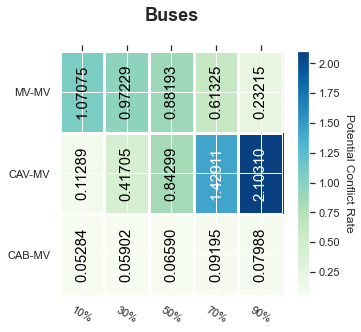

In [51]:
fig, ax = plt.subplots()

fig.set_figheight(3*1.5)
fig.set_figwidth(5)

im, cbar = heatmap(frequency_AB, collisiontype_AB, CAVPenetration_AB, ax=ax,
                   cmap="GnBu", cbarlabel="Potential Conflict Rate")
texts = annotate_heatmap(im, valfmt="{x:.5f}")

#fig.tight_layout()
#ax.set_title("Number of Potential Collisions Detected by Surrogate Safety Assessment Model", loc="center", pad = 30, fontsize =18,fontweight='bold')
ax.set_title("Connected Autonomous Buses", loc="center", pad = 30, fontsize =18,fontweight='bold')

plt.show()

In [52]:
collisiontype_AB = ["MV-MV", "CAV-MV", "CAB-MV"]
#CAVPenetration = ["10%", "30%", "50%",
#           "70%", "90%", "50%", "60%", "70%", "80%", "90%", "100%"]

CAVPenetration_AB = ["10%", "30%", "50%","70%", "90%"]

#frequency_bus = np.array([[(7333/(90*Demand)), (3804/(70*Demand)), (3129/(50*Demand)), (2466/(30*Demand)), (2496/(10*Demand))],
#                    [(7354/(90*Demand)), (3551/(70*Demand)), (2796/(50*Demand)), (2480/(30*Demand)), (2511/(10*Demand))],  
#                    [(7563/(90*Demand)), (3708/(70*Demand)), (2804/(50*Demand)), (2560/(30*Demand)), (2592/(10*Demand))]])

#frequency_bus = np.array([[7333, 3804, 3129, 2466, 2496],
#                    [7354, 3551, 2796, 2480, 2511],  
#                    [7563, 3708, 2804, 2560, 2592]])

frequency_AB = np.array([[(AB_10_MV_MV), (AB_30_MV_MV), (AB_50_MV_MV), (AB_70_MV_MV), (AB_90_MV_MV)],
                    [(AB_10_CAV_MV), (AB_30_CAV_MV), (AB_50_CAV_MV), (AB_70_CAV_MV), (AB_90_CAV_MV)],  
                    [(AB_10_BUS_MV), (AB_30_BUS_MV), (AB_50_BUS_MV), (AB_70_BUS_MV), (AB_90_BUS_MV)]])


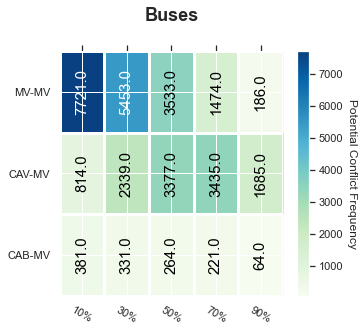

In [53]:
fig, ax = plt.subplots()

fig.set_figheight(3*1.5)
fig.set_figwidth(5)

im, cbar = heatmap(frequency_AB, collisiontype_AB, CAVPenetration_AB, ax=ax,
                   cmap="GnBu", cbarlabel="Potential Conflict Frequency")
texts = annotate_heatmap(im, valfmt="{x:.1f}")

#fig.tight_layout()
#ax.set_title("Number of Potential Collisions Detected by Surrogate Safety Assessment Model", loc="center", pad = 30, fontsize =18,fontweight='bold')
ax.set_title("Connected Automated Buses", loc="center", pad = 30, fontsize =18,fontweight='bold')

plt.show()

# Buses

In [54]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    #im = ax.imshow(data, aspect = 2,**kwargs)
    #im = ax.imshow(data, aspect = 3, cmap='seismic')
    #im = ax.imshow(data, **kwargs)
    im = ax.imshow(data, aspect = 'auto',**kwargs, filternorm=True)
#seismic, viridis, inferno
    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=False, labelbottom=True)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="center")
             #rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(fontsize= 15, horizontalalignment="center",
              verticalalignment="center", rotation=90)
    kw.update(textkw)
    
 ##   {'fontsize': rcParams['axes.titlesize'],
 ##'fontweight' : rcParams['axes.titleweight'],
 ##'verticalalignment': 'baseline',
 ##'horizontalalignment': loc}

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [55]:
collisiontype_BUS = ["MV-MV", "CAV-MV", "Bus-MV", "Bus-Bus", "MV-Bus", "CAV-Bus"]
#CAVPenetration = ["10%", "30%", "50%",
#           "70%", "90%", "50%", "60%", "70%", "80%", "90%", "100%"]

CAVPenetration_BUS = ["10%", "30%", "50%","70%", "90%"]

#frequency_CAB = np.array([[7333, 3804, 3129, 2466, 2496],
#                    [7354, 3551, 2796, 2480, 2511],  
#                    [7563, 3708, 2804, 2560, 2592],
#                    [7563, 3708, 2804, 2560, 2592],
#                    [7563, 3708, 2804, 2560, 2592],
#                    [7563, 3708, 2804, 2560, 2592],])

frequency_BUS = np.array([[(BUS_10_MV_MV/(90*Demand)), (BUS_30_MV_MV/(70*Demand)), (BUS_50_MV_MV/(50*Demand)), (BUS_70_MV_MV/(30*Demand)), (BUS_90_MV_MV/(10*Demand))],
                    [(BUS_10_CAV_MV/(90*Demand)), (BUS_30_CAV_MV/(70*Demand)), (BUS_50_CAV_MV/(50*Demand)), (BUS_70_CAV_MV/(30*Demand)), (BUS_90_CAV_MV/(10*Demand))],  
                    [(BUS_10_BUS_MV/(90*Demand)), (BUS_30_BUS_MV/(70*Demand)), (BUS_50_BUS_MV/(50*Demand)), (BUS_70_BUS_MV/(30*Demand)), (BUS_90_BUS_MV/(10*Demand))],
                    [(BUS_10_BUS_BUS/(90*Demand)), (BUS_30_BUS_BUS/(70*Demand)), (BUS_50_BUS_BUS/(50*Demand)), (BUS_70_BUS_BUS/(30*Demand)), (BUS_90_BUS_BUS/(10*Demand))],
                    [(BUS_10_MV_BUS/(90*Demand)), (BUS_30_MV_BUS/(70*Demand)), (BUS_50_MV_BUS/(50*Demand)), (BUS_70_MV_BUS/(30*Demand)), (BUS_90_MV_BUS/(10*Demand))],
                    [(BUS_10_CAV_BUS/(90*Demand)), (BUS_30_CAV_BUS/(70*Demand)), (BUS_50_CAV_BUS/(50*Demand)), (BUS_70_CAV_BUS/(30*Demand)), (BUS_90_CAV_BUS/(10*Demand))]])


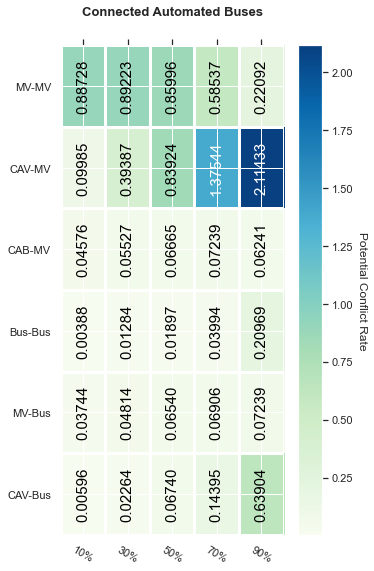

In [56]:
fig, ax = plt.subplots() #figsize(10,10)

fig.set_figheight(9)
fig.set_figwidth(5)

im, cbar = heatmap(frequency_BUS, collisiontype_BUS, CAVPenetration_BUS, ax=ax,
                   cmap="GnBu", cbarlabel="Potential Conflict Rate")
texts = annotate_heatmap(im, valfmt="{x:.5f}")

#fig.tight_layout()
#ax.set_title("Number of Potential Collisions Detected by Surrogate Safety Assessment Model", loc="center", pad = 30, fontsize =18,fontweight='bold')
ax.set_title("Human Driven Buses", loc="center", pad = 30, fontsize =13,fontweight='bold')

plt.show()

In [57]:
collisiontype_BUS = ["MV-MV", "CAV-MV", "Bus-MV", "Bus-Bus", "MV-Bus", "CAV-Bus"]
#CAVPenetration = ["10%", "30%", "50%",
#           "70%", "90%", "50%", "60%", "70%", "80%", "90%", "100%"]

CAVPenetration_BUS = ["10%", "30%", "50%","70%", "90%"]

#frequency_CAB = np.array([[7333, 3804, 3129, 2466, 2496],
#                    [7354, 3551, 2796, 2480, 2511],  
#                    [7563, 3708, 2804, 2560, 2592],
#                    [7563, 3708, 2804, 2560, 2592],
#                    [7563, 3708, 2804, 2560, 2592],
#                    [7563, 3708, 2804, 2560, 2592],])

frequency_BUS = np.array([[(BUS_10_MV_MV), (BUS_30_MV_MV), (BUS_50_MV_MV), (BUS_70_MV_MV), (BUS_90_MV_MV)],
                    [(BUS_10_CAV_MV), (BUS_30_CAV_MV), (BUS_50_CAV_MV), (BUS_70_CAV_MV), (BUS_90_CAV_MV)],  
                    [(BUS_10_BUS_MV), (BUS_30_BUS_MV), (BUS_50_BUS_MV), (BUS_70_BUS_MV), (BUS_90_BUS_MV)],
                    [(BUS_10_BUS_BUS), (BUS_30_BUS_BUS), (BUS_50_BUS_BUS), (BUS_70_BUS_BUS), (BUS_90_BUS_BUS)],
                    [(BUS_10_MV_BUS), (BUS_30_MV_BUS), (BUS_50_MV_BUS), (BUS_70_MV_BUS), (BUS_90_MV_BUS)],
                    [(BUS_10_CAV_BUS), (BUS_30_CAV_BUS), (BUS_50_CAV_BUS), (BUS_70_CAV_BUS), (BUS_90_CAV_BUS)]])


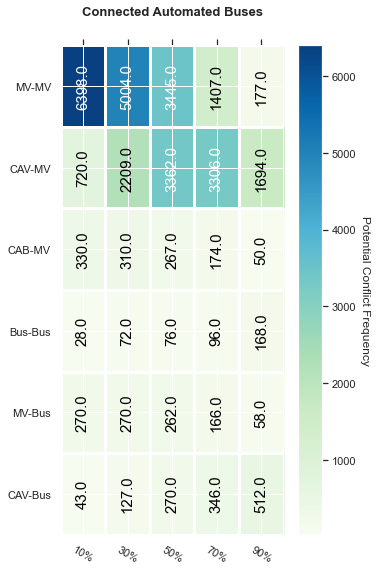

In [58]:
fig, ax = plt.subplots() #figsize(10,10)

fig.set_figheight(9)
fig.set_figwidth(5)

im, cbar = heatmap(frequency_BUS, collisiontype_BUS, CAVPenetration_BUS, ax=ax,
                   cmap="GnBu", cbarlabel="Potential Conflict Frequency")
texts = annotate_heatmap(im, valfmt="{x:.1f}")

#fig.tight_layout()
#ax.set_title("Number of Potential Collisions Detected by Surrogate Safety Assessment Model", loc="center", pad = 30, fontsize =18,fontweight='bold')
ax.set_title("Human Driven Buses", loc="center", pad = 30, fontsize =13,fontweight='bold')

plt.show()